# Indian Weather Data (EDA Project)

### Dataset Source  
[Kaggle: Indian Weather Data](https://www.kaggle.com/datasets/pratikjadhav05/indian-weather-data)  

### Dataset Summary
- **Total Entries:** 24,070  
- **Time Period:** **August 25, 2023 (21:46:41) → August 26, 2023 (04:27:50)**
- **Time Granularity:** Minute-level data  

# Setup and sanatize data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings


In [2]:
df = pd.read_csv('Weather-data.csv')
df

last_updated_epoch  temperature_celsius  temperature_fahrenheit  \
0              1693000001                 27.5                    81.5   
1              1693000002                 27.5                    81.5   
2              1693000003                 26.3                    79.3   
3              1693000004                 25.6                    78.1   
4              1693000005                 27.2                    81.0   
...                   ...                  ...                     ...   
24065          1693024066                 26.0                    78.8   
24066          1693024067                 22.5                    72.5   
24067          1693024068                 24.7                    76.5   
24068          1693024069                 22.2                    72.0   
24069          1693024070                 26.7                    80.1   

       wind_mph  wind_kph  wind_degree wind_direction  pressure_mb  \
0          12.8      20.5          281            WNW         1008   
1           9.6      15.5          287            WNW         1008   
2          11.4      18.4          317             NW         1009   
3          10.5      16.9          297            WNW         1009   
4          10.1      16.2          274              W         1009   
...         ...       ...          ...            ...          ...   
24065       4.3       6.8          320             NW         1010   
24066       2.2       3.6          123            ESE         1011   
24067       2.2       3.6           83              E         1009   
24068       6.3      10.1          267              W         1011   
24069       2.2       3.6          346            NNW         1012   

       pressure_in  precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
0            29.77       0.00       0.00        67     26                29.7   
1            29.78       0.00       0.00        70     19                30.0   
2            29.78       0.00       0.00        70     51                28.2   
3            29.80       0.00       0.00        76     65                27.6   
4            29.79       0.00       0.00        74     82                29.9   
...            ...        ...        ...       ...    ...                 ...   
24065        29.83       0.00       0.00        70      0                26.7   
24066        29.85       0.01       0.00        99    100                25.1   
24067        29.81       0.28       0.01        90     71                27.3   
24068        29.85       0.03       0.00        88     75                24.6   
24069        29.88       0.00       0.00        69      8                28.7   

       feels_like_fahrenheit  visibility_km  visibility_miles  uv_index  \
0                       85.5           10.0                 6         7   
1                       86.0           10.0                 6         7   
2                       82.8           10.0                 6         7   
3                       81.7           10.0                 6         6   
4                       85.8           10.0                 6         6   
...                      ...            ...               ...       ...   
24065                   80.0            2.5                 1         1   
24066                   77.1            0.0                 0         1   
24067                   81.2            9.0                 5         1   
24068                   76.3           10.0                 6         1   
24069                   83.7           10.0                 6         1   

       gust_mph  gust_kph  
0          14.8      23.8  
1          11.2      18.0  
2          13.2      21.2  
3          13.0      20.9  
4          11.6      18.7  
...         ...       ...  
24065       8.0      12.9  
24066       1.4       2.2  
24067       3.1       4.9  
24068      11.5      18.5  
24069       2.2       3.6  

[24070 rows x 20 columns]

In [3]:
# print(df.info())
# print(df.isnull().sum())
# print(df.describe())

In [4]:
df['Date'] = pd.to_datetime(df['last_updated_epoch'], unit='s') 
df['Hour'] = df['Date'].dt.hour #create hours column for furthur analysis 
df2 =  df.drop(columns=['Date','last_updated_epoch','temperature_fahrenheit', 'feels_like_fahrenheit', 'visibility_miles','wind_mph', 'gust_mph', 'pressure_in', 'precip_in', 'feels_like_celsius'],axis = 1)
df2 = df2.dropna()
# print(df2.info())
# df2.columns
df2

temperature_celsius  wind_kph  wind_degree wind_direction  pressure_mb  \
0                     27.5      20.5          281            WNW         1008   
1                     27.5      15.5          287            WNW         1008   
2                     26.3      18.4          317             NW         1009   
3                     25.6      16.9          297            WNW         1009   
4                     27.2      16.2          274              W         1009   
...                    ...       ...          ...            ...          ...   
24065                 26.0       6.8          320             NW         1010   
24066                 22.5       3.6          123            ESE         1011   
24067                 24.7       3.6           83              E         1009   
24068                 22.2      10.1          267              W         1011   
24069                 26.7       3.6          346            NNW         1012   

       precip_mm  humidity  cloud  visibility_km  uv_index  gust_kph  Hour  
0           0.00        67     26           10.0         7      23.8    21  
1           0.00        70     19           10.0         7      18.0    21  
2           0.00        70     51           10.0         7      21.2    21  
3           0.00        76     65           10.0         6      20.9    21  
4           0.00        74     82           10.0         6      18.7    21  
...          ...       ...    ...            ...       ...       ...   ...  
24065       0.00        70      0            2.5         1      12.9     4  
24066       0.01        99    100            0.0         1       2.2     4  
24067       0.28        90     71            9.0         1       4.9     4  
24068       0.03        88     75           10.0         1      18.5     4  
24069       0.00        69      8           10.0         1       3.6     4  

[24070 rows x 12 columns]

# Hourly Analysis

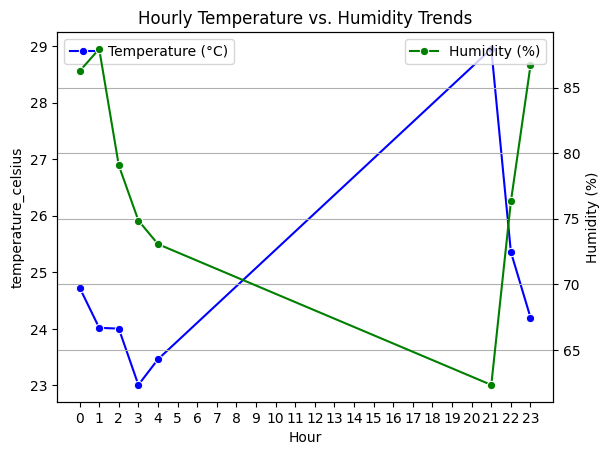

In [5]:
hourly_data = df2.groupby('Hour')[['temperature_celsius', 'humidity']].mean().reset_index()

sns.lineplot(x='Hour', y='temperature_celsius', data=hourly_data, marker='o', color='b', label='Temperature (°C)') # mean hourly Temperature 
ax2 = plt.gca().twinx()  # Create a secondary y-axis
sns.lineplot(x='Hour', y='humidity', data=hourly_data, marker='o', color='g', label='Humidity (%)', ax=ax2) #and plot humidity here

plt.xlabel("Hour of the Day")
plt.title("Hourly Temperature vs. Humidity Trends")
plt.ylabel("Humidity (%)")
plt.xticks(range(0, 24))  # Ensure all 24 hours are visible on the x-axis
plt.grid(True)
plt.show()


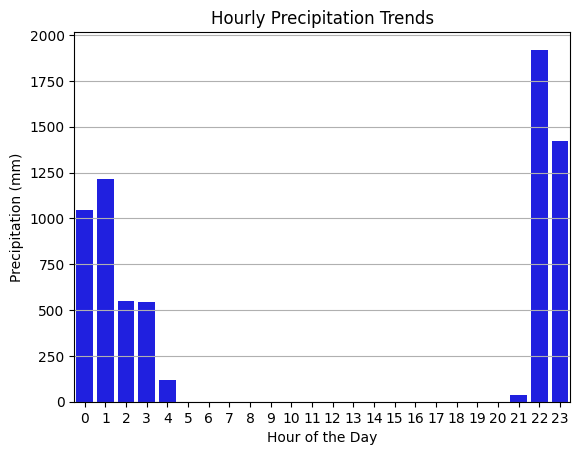

In [6]:
hourly_precip = df2.groupby('Hour', as_index=False)['precip_mm'].sum() #total hourly precipitation
full_hours = pd.DataFrame({'Hour': np.arange(24)})  # forcde create df for all 24 hours (limited data available)
hourly_precip = full_hours.merge(hourly_precip, on='Hour', how='left').fillna(0)  # Merge and fill missing values with 0

sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Precipitation (mm)")
plt.title("Hourly Precipitation Trends")
plt.xticks(range(0, 24)) 
plt.grid(axis='y')
plt.show()


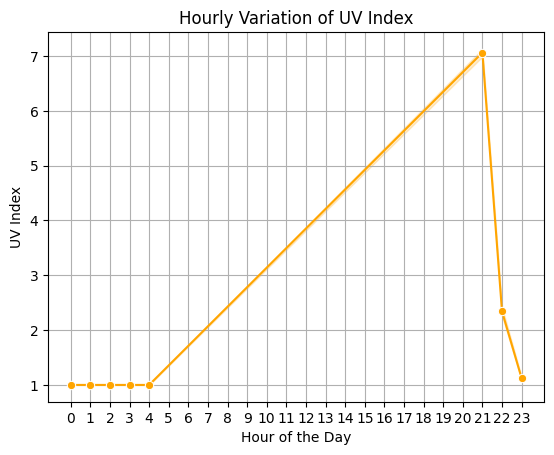

In [7]:
sns.lineplot(data=df2, x="Hour", y="uv_index", marker="o", color="orange")
plt.xlabel("Hour of the Day")
plt.ylabel("UV Index")
plt.title("Hourly Variation of UV Index")
plt.grid()
plt.xticks(range(0, 24))
plt.show()


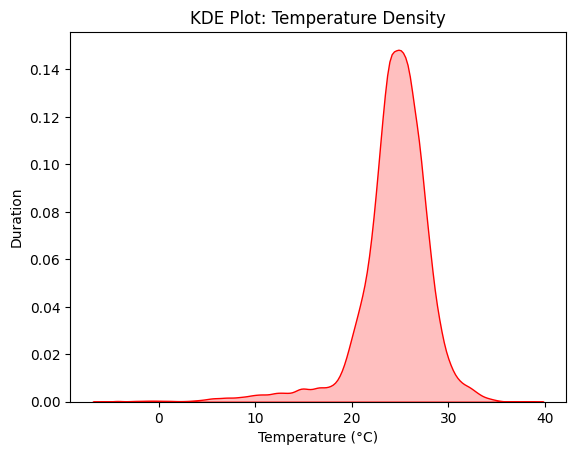

In [8]:
sns.kdeplot(df2["temperature_celsius"], shade=True, color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Duration")
plt.title("KDE Plot: Temperature Density")
plt.show()


# Simultaneous Visualization 

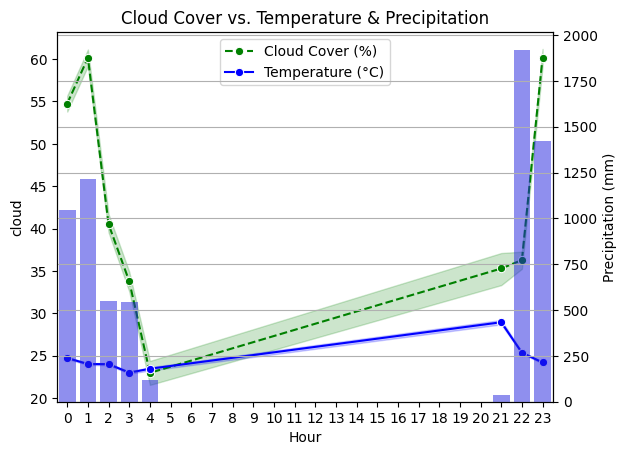

In [9]:
sns.lineplot(x='Hour', y='cloud', data=df2, marker='o', linestyle = 'dashed', color='green', label='Cloud Cover (%)')
sns.lineplot(x='Hour', y='temperature_celsius', data=df2, marker='o', color='b', label='Temperature (°C)')
ax2 = plt.gca().twinx() # Overlay Precipitation (secondary y-axis)
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

plt.xlabel("Hour of the Day")
plt.title("Cloud Cover vs. Temperature & Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


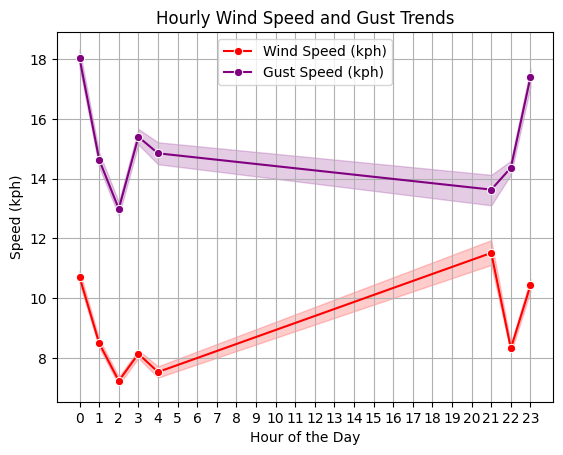

In [10]:
sns.lineplot(data=df2 , x='Hour', y='wind_kph',  marker='o', color='red', label='Wind Speed (kph)')
sns.lineplot( data=df2, x='Hour', y='gust_kph', marker='o', color='purple', label='Gust Speed (kph)')

plt.xlabel("Hour of the Day")
plt.ylabel("Speed (kph)")
plt.title("Hourly Wind Speed and Gust Trends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


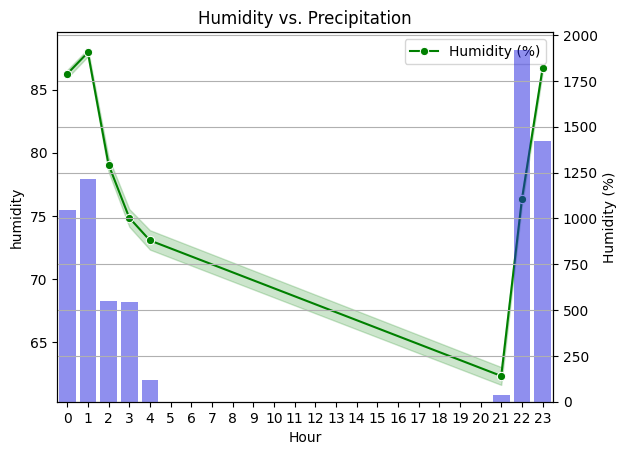

In [11]:
sns.lineplot(x='Hour', y='humidity', data=df2, marker='o', color='g', label='Humidity (%)')
ax2 = plt.gca().twinx()
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

plt.xlabel("Hour of the Day")
plt.title("Humidity vs. Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.ylabel("Humidity (%)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


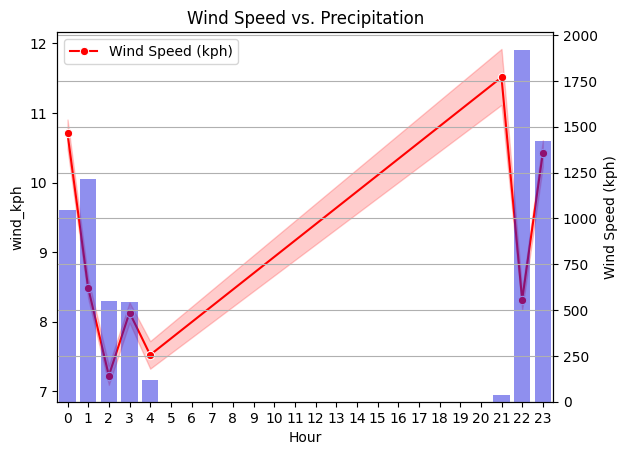

In [12]:
sns.lineplot(x='Hour', y='wind_kph', data=df2, marker='o', color='red', label='Wind Speed (kph)')

# Overlay Precipitation (secondary y-axis)
ax2 = plt.gca().twinx()
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

# Labels and title
plt.xlabel("Hour of the Day")
plt.title("Wind Speed vs. Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.ylabel("Wind Speed (kph)")
plt.xticks(range(0, 24))
plt.grid(True)

# Show the plot
plt.show()

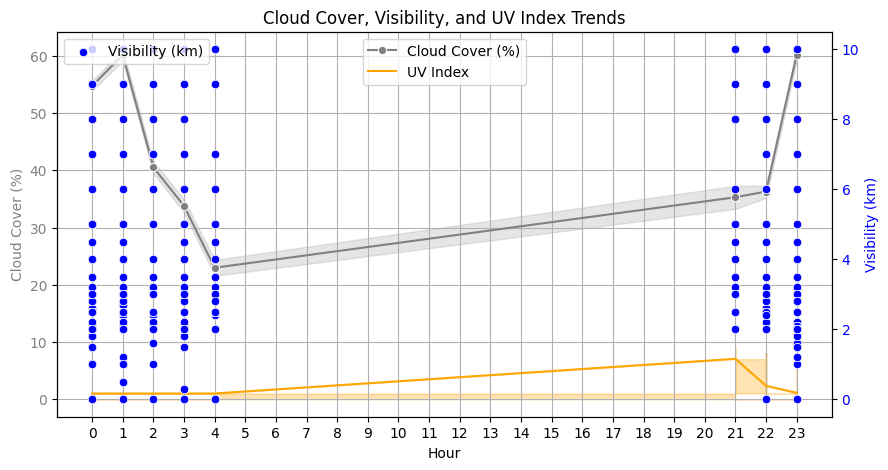

In [13]:

fig, ax1 = plt.subplots(figsize=(10, 5))

# Line plot for Cloud Cover
sns.lineplot(x='Hour', y='cloud', data=df2, marker='o', color='gray', label='Cloud Cover (%)', ax=ax1)
ax1.set_ylabel("Cloud Cover (%)", color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Overlay Scatter for Visibility (Secondary Y-Axis)
ax2 = ax1.twinx()
sns.scatterplot(x='Hour', y='visibility_km', data=df2, color='blue', label='Visibility (km)', ax=ax2)
ax2.set_ylabel("Visibility (km)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Overlay UV Index as Area Plot
sns.lineplot(x='Hour', y='uv_index', data=df2, color='orange', label='UV Index', ax=ax1)
ax1.fill_between(df2['Hour'], df2['uv_index'], alpha=0.3, color='orange')

# Labels and Title
plt.xlabel("Hour of the Day")
plt.title("Cloud Cover, Visibility, and UV Index Trends")
plt.xticks(range(0, 24))
ax1.grid(True)

# Show Plot
plt.legend(loc='upper left')
plt.show()


# Pairplot (multiple variables against each other)

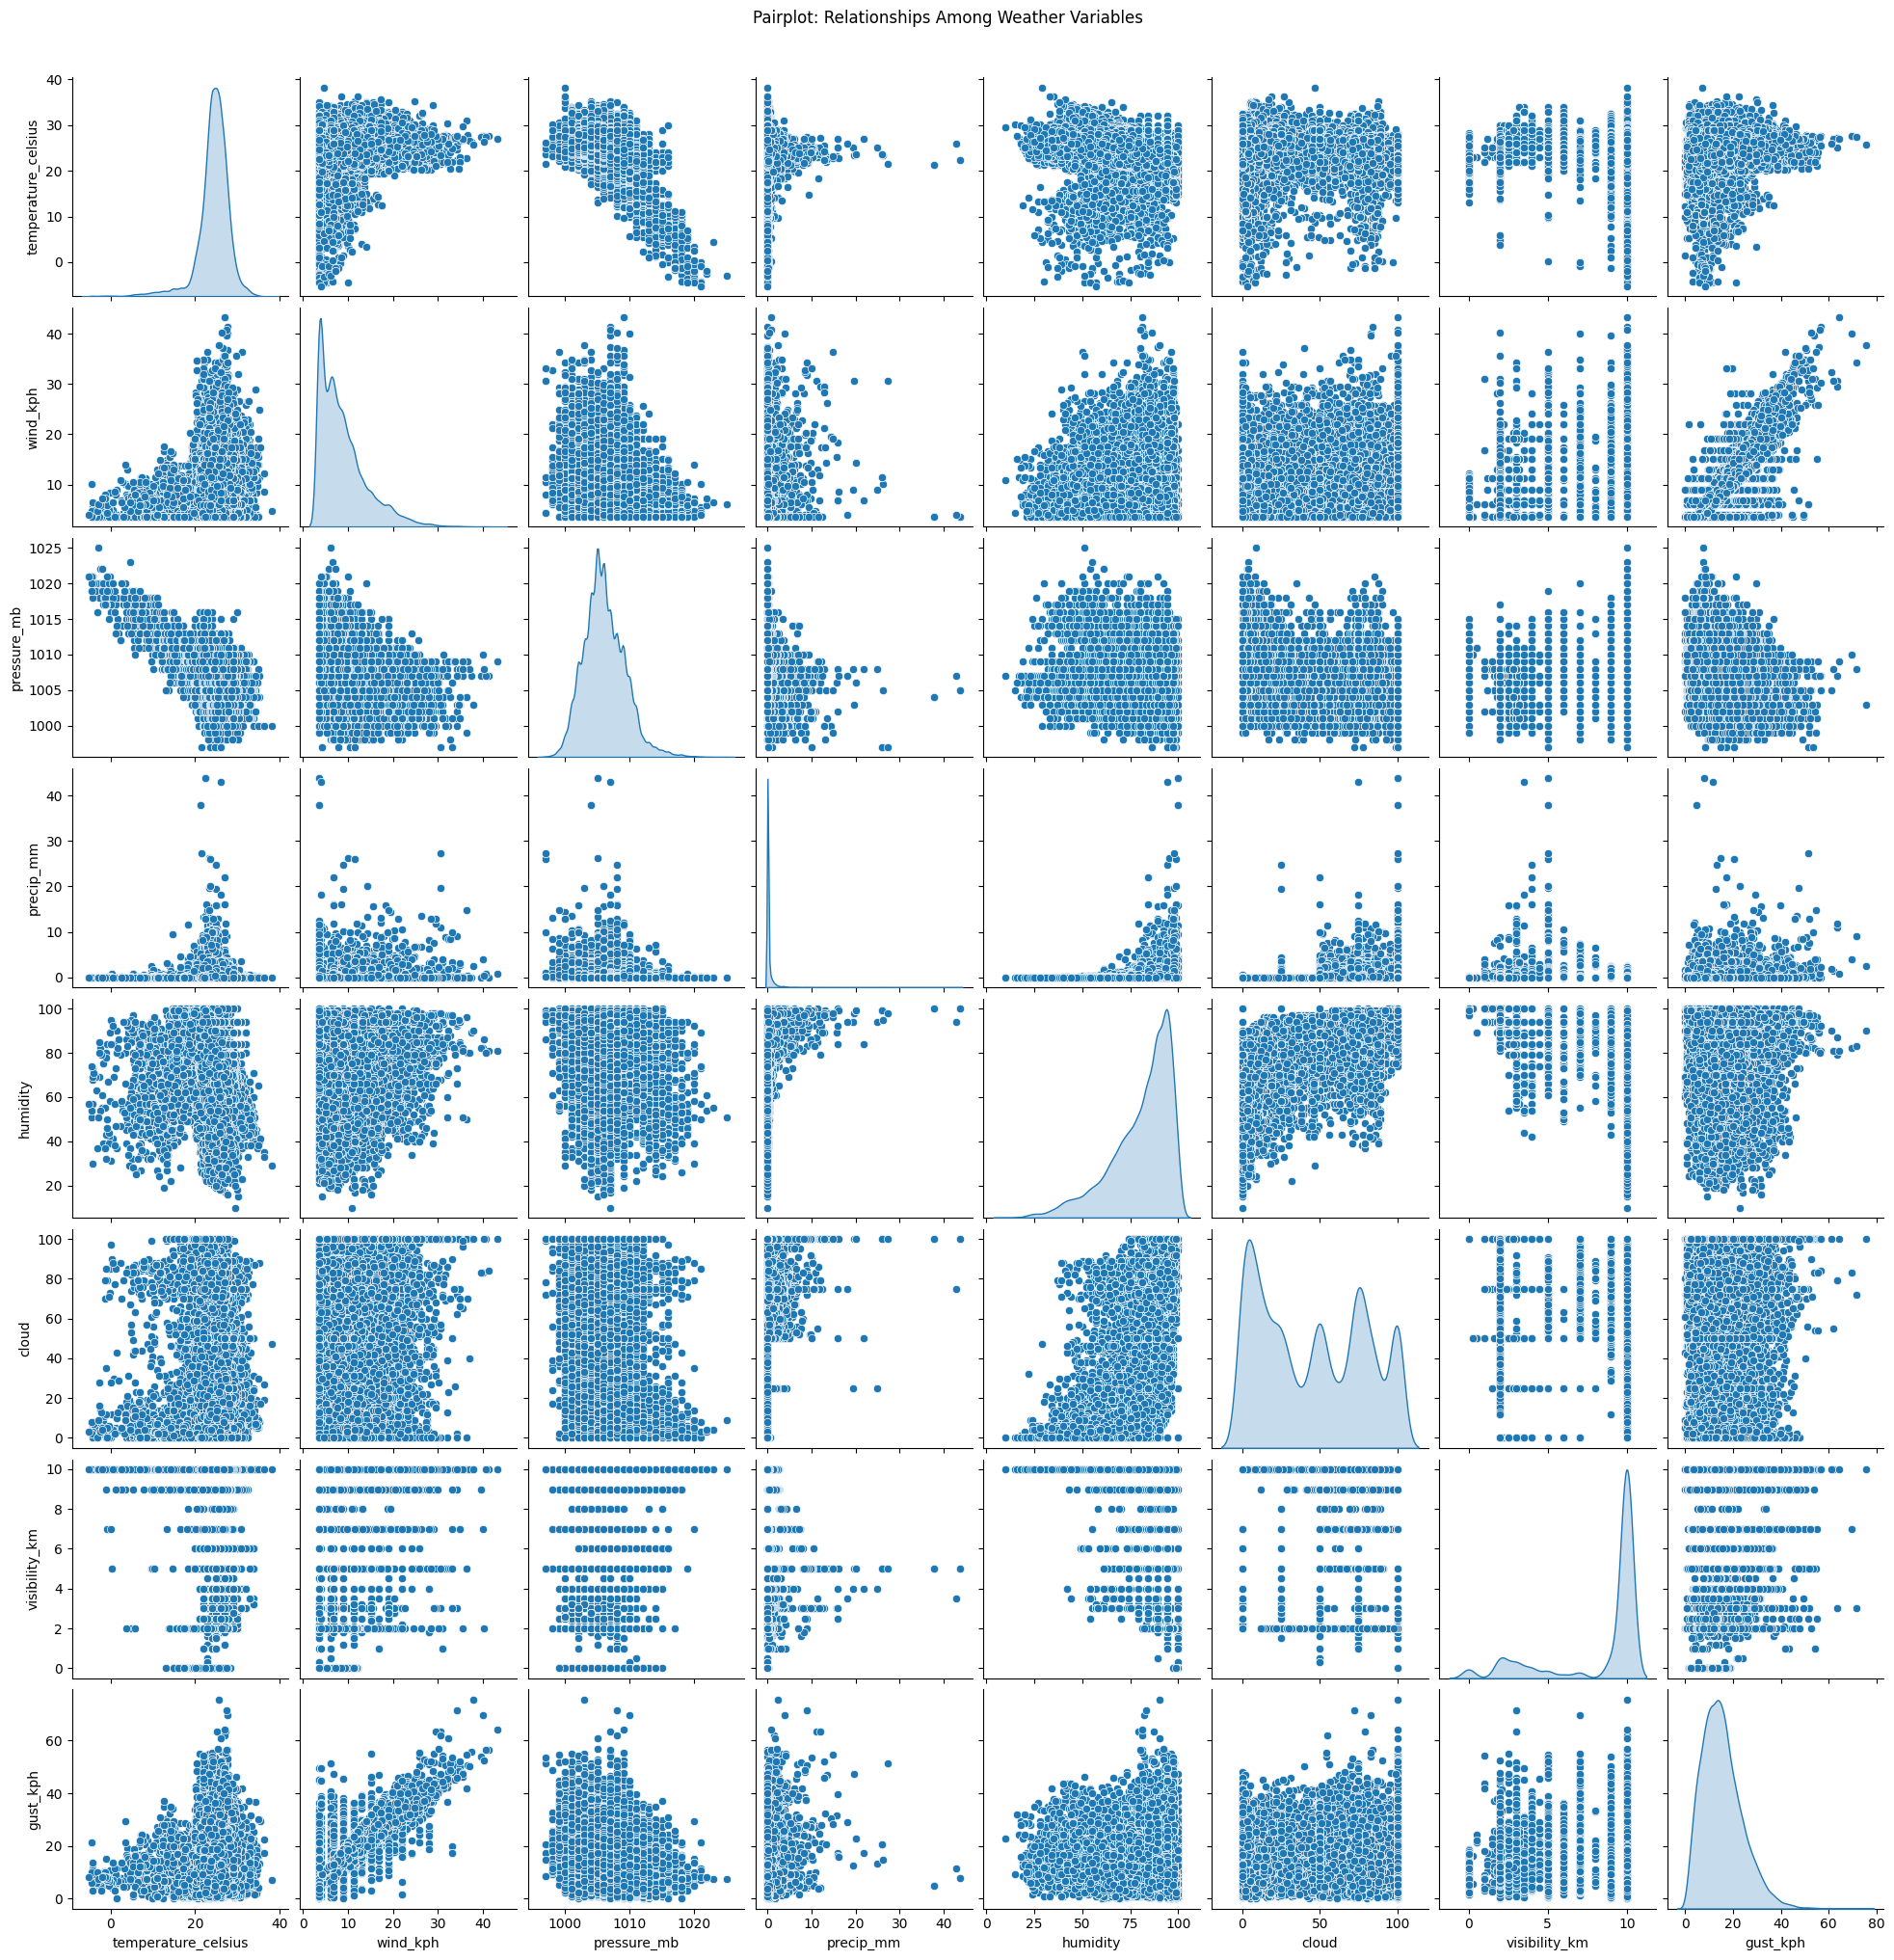

In [14]:
sns.pairplot(df2[['temperature_celsius', 'wind_kph','pressure_mb', 'precip_mm', 'humidity', 'cloud', 'visibility_km', 'gust_kph']],
             diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot: Relationships Among Weather Variables", y=1.02)
plt.show()

# Distribution

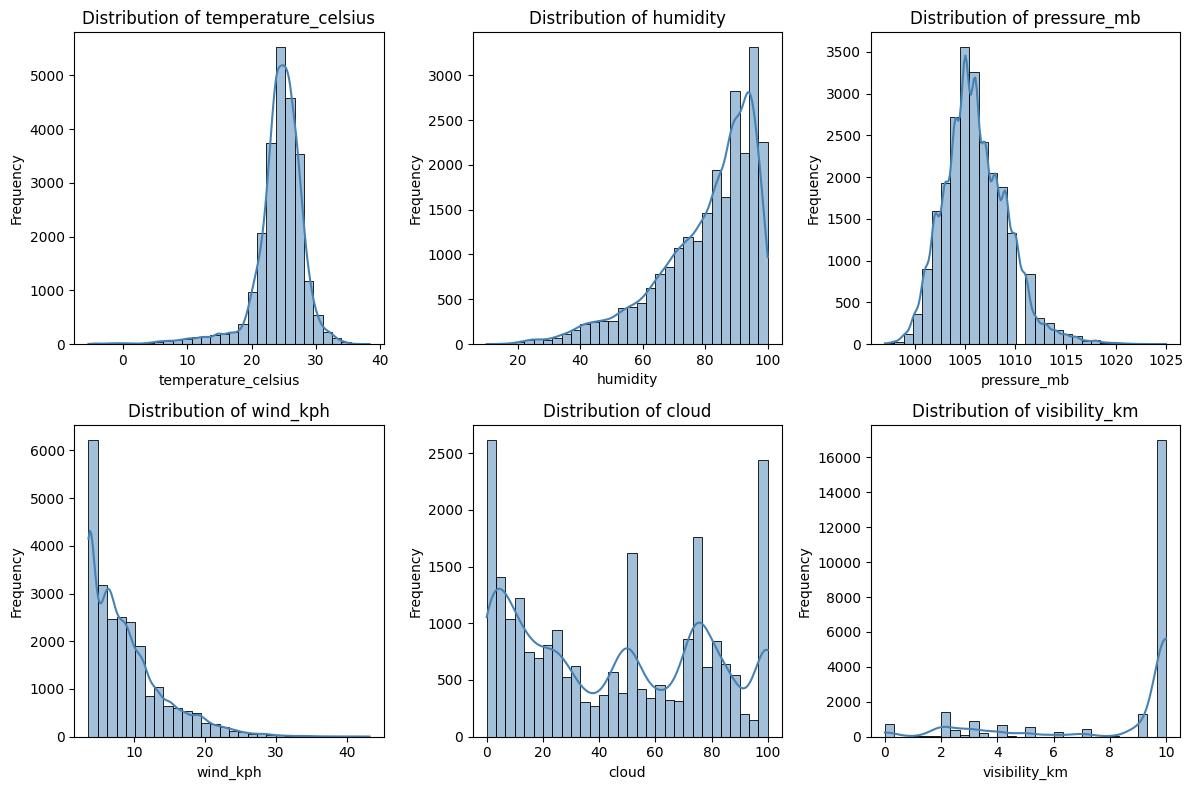

In [15]:
# List of numeric columns to plot
columns_to_plot = ["temperature_celsius", "humidity", "pressure_mb", "wind_kph", "cloud" , "visibility_km"]

# Plot histograms & density plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df2[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Regression Analysis

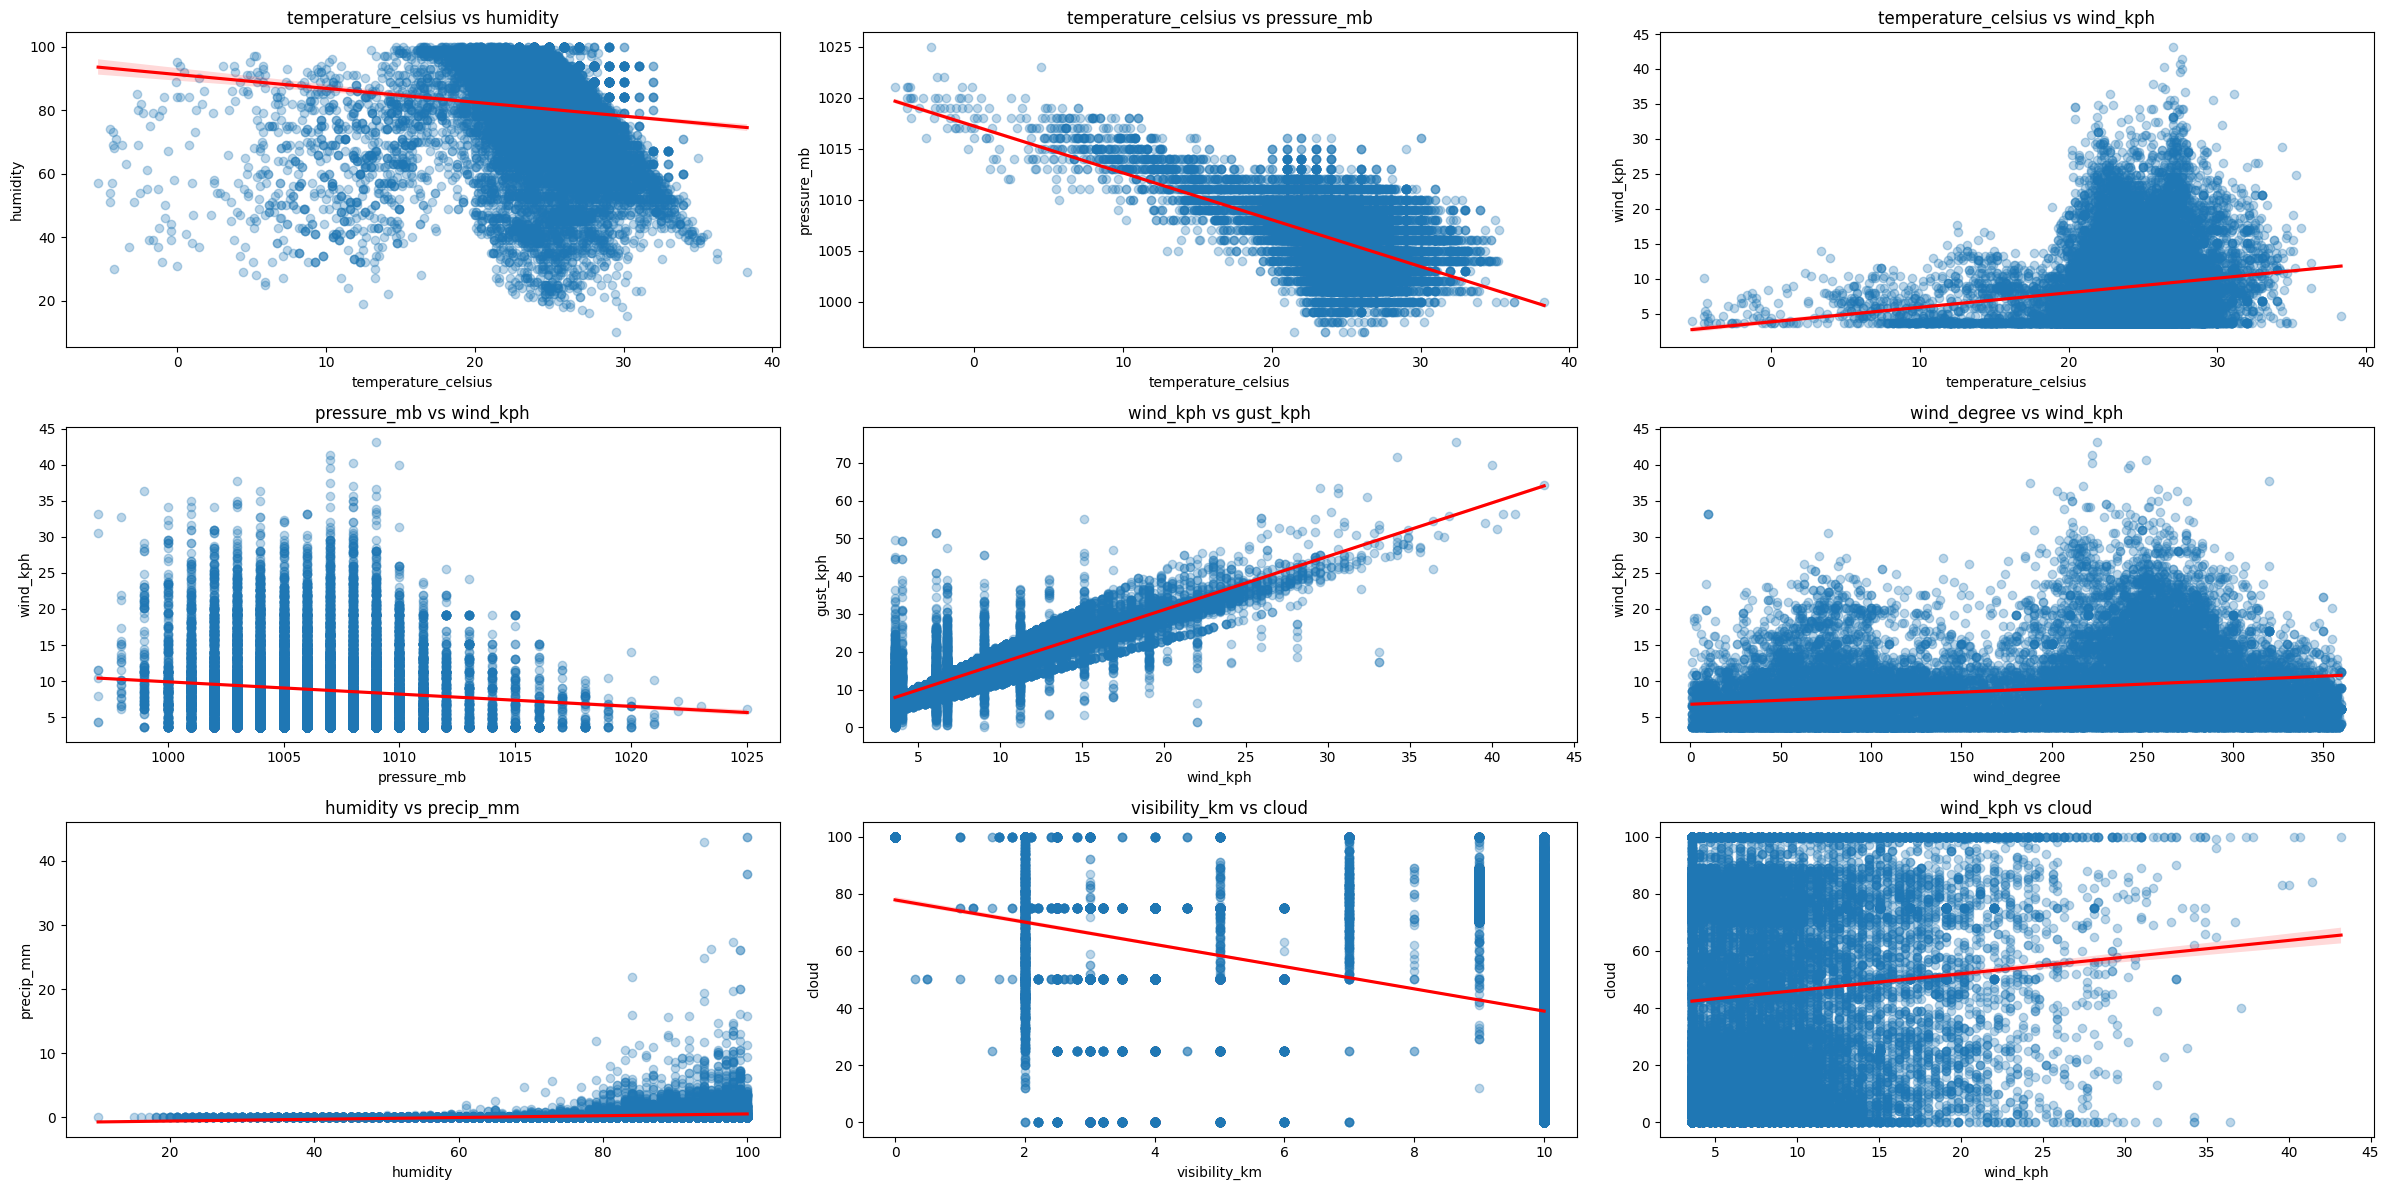

In [16]:
# Expanded scatter pairs for regression analysis
scatter_pairs = [
    ("temperature_celsius", "humidity"),       
    ("temperature_celsius", "pressure_mb"),    
    ("temperature_celsius", "wind_kph"),       
    ("pressure_mb", "wind_kph"),
    ("wind_kph", "gust_kph"),                  
    ("wind_degree", "wind_kph"),               
    ("humidity", "precip_mm"),                 
    ("visibility_km", "cloud"),                
    ("wind_kph", "cloud"),                     
]


# Plot scatter plots with regression lines
plt.figure(figsize=(24, 12))
for i, (x_var, y_var) in enumerate(scatter_pairs, 1):
    plt.subplot(3, 3, i)
    sns.regplot(data=df2, x=x_var, y=y_var, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f"{x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()




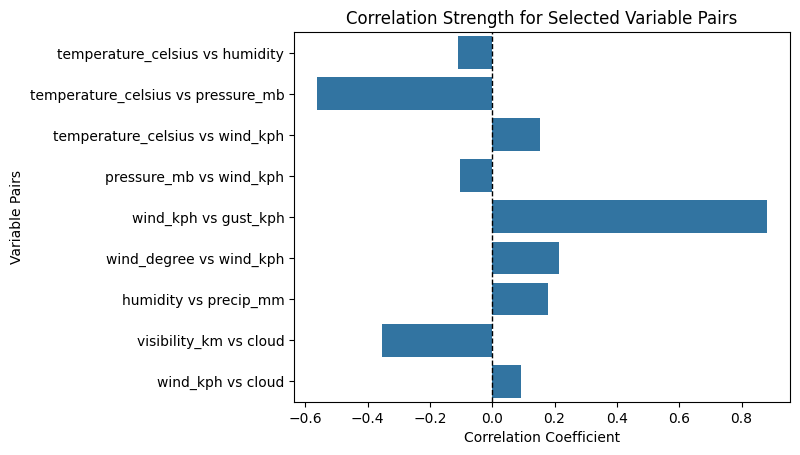

Correlations Among Selected Pairs: 

                     Variable Pair  Correlation
   temperature_celsius vs humidity    -0.109270
temperature_celsius vs pressure_mb    -0.563663
   temperature_celsius vs wind_kph     0.154717
           pressure_mb vs wind_kph    -0.103027
              wind_kph vs gust_kph     0.883354
           wind_degree vs wind_kph     0.214899
             humidity vs precip_mm     0.180045
            visibility_km vs cloud    -0.352279
                 wind_kph vs cloud     0.091149


In [17]:
correlations = {f"{x_var} vs {y_var}": df2[x_var].corr(df2[y_var]) for x_var, y_var in scatter_pairs}
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Variable Pair", "Correlation"])

sns.barplot(data=correlation_df, x="Correlation", y="Variable Pair")
plt.axvline(0, color="black", linestyle="--", linewidth=1) #x=0 line
plt.title("Correlation Strength for Selected Variable Pairs")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.show()

print("Correlations Among Selected Pairs: \n")
print(correlation_df.to_string(index=False))

# Wind direction Analysis
(note that limited data of only 6 hours is available )

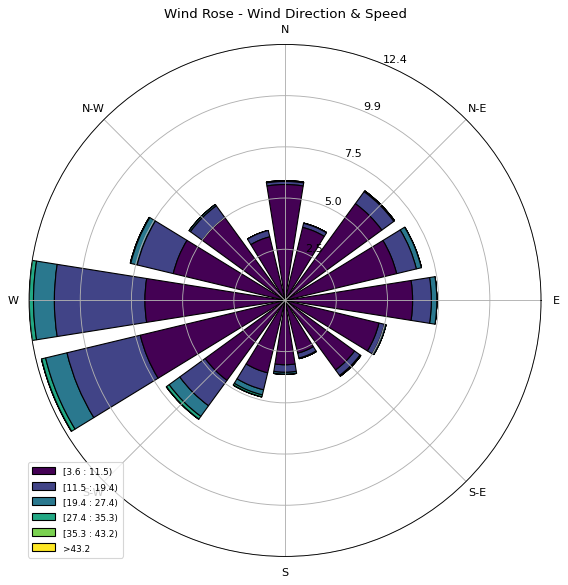

In [18]:
from windrose import WindroseAxes

# Create wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df2["wind_degree"], df2["wind_kph"], normed=True, opening=0.8, edgecolor='black')
ax.set_legend()
plt.title("Wind Rose - Wind Direction & Speed")
plt.show()


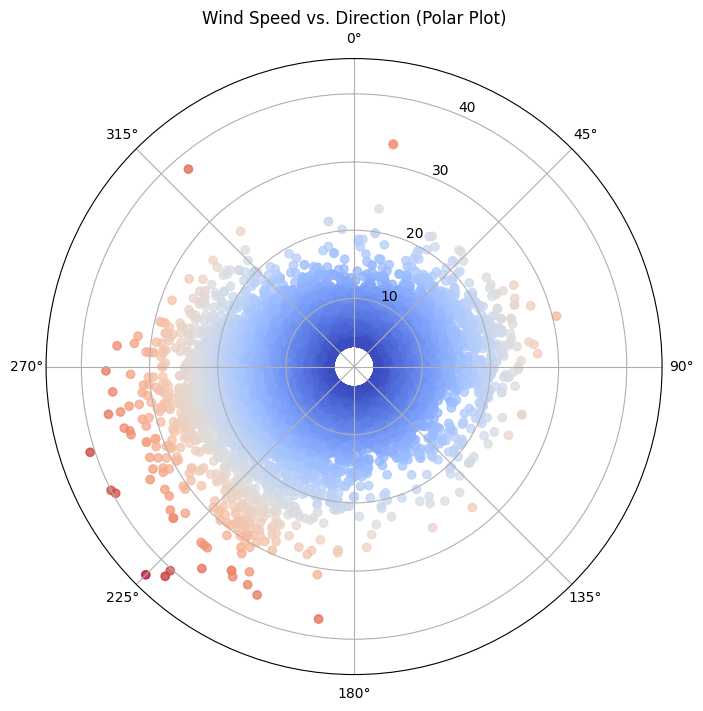

In [19]:
# Convert degrees to radians for plotting
wind_rad = np.radians(df2["wind_degree"])

# Plot polar graph
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(wind_rad, df2["wind_kph"], c=df2["wind_kph"], cmap="coolwarm", alpha=0.75)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Wind Speed vs. Direction (Polar Plot)")
plt.show()


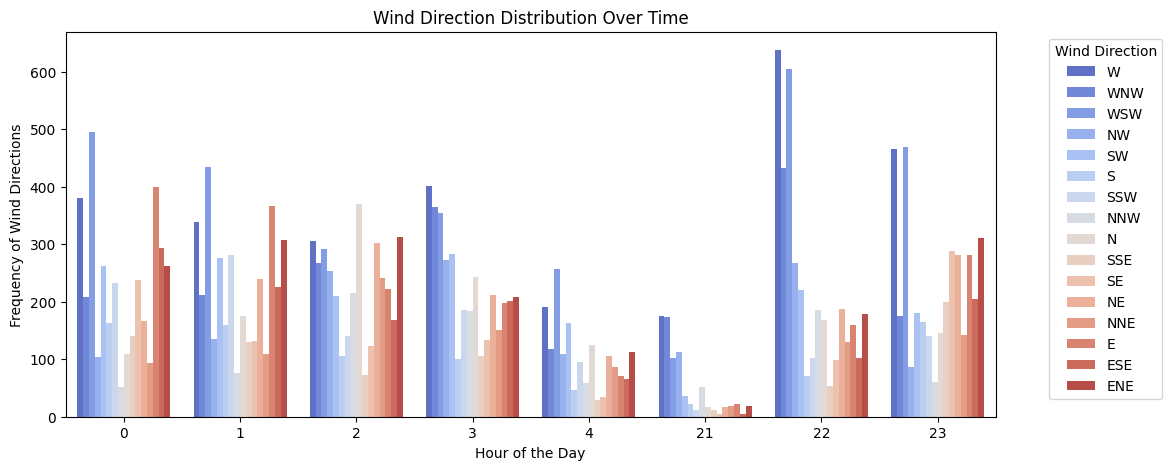

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x="Hour", hue="wind_direction", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency of Wind Directions")
plt.title("Wind Direction Distribution Over Time")
plt.legend(title="Wind Direction", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


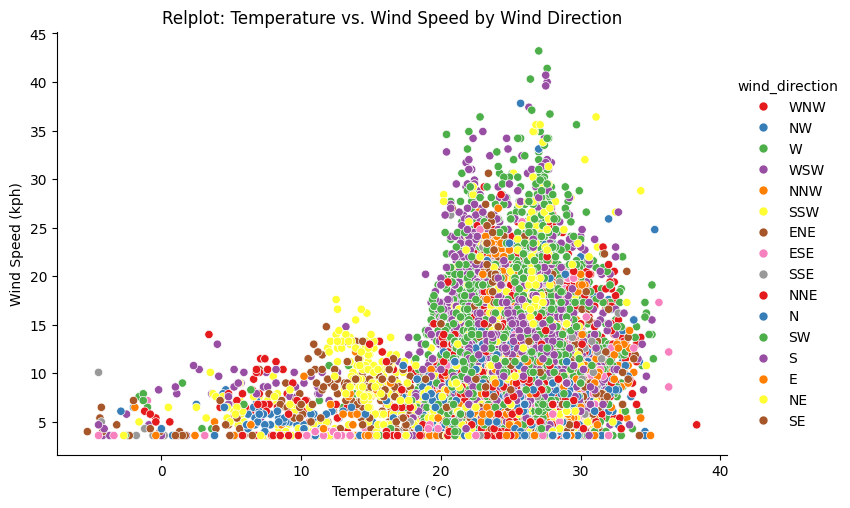

In [21]:
sns.relplot(x="temperature_celsius", y="wind_kph", data=df2, hue="wind_direction",
            kind="scatter", aspect=1.5, palette="Set1")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (kph)")
plt.title("Relplot: Temperature vs. Wind Speed by Wind Direction")
plt.show()


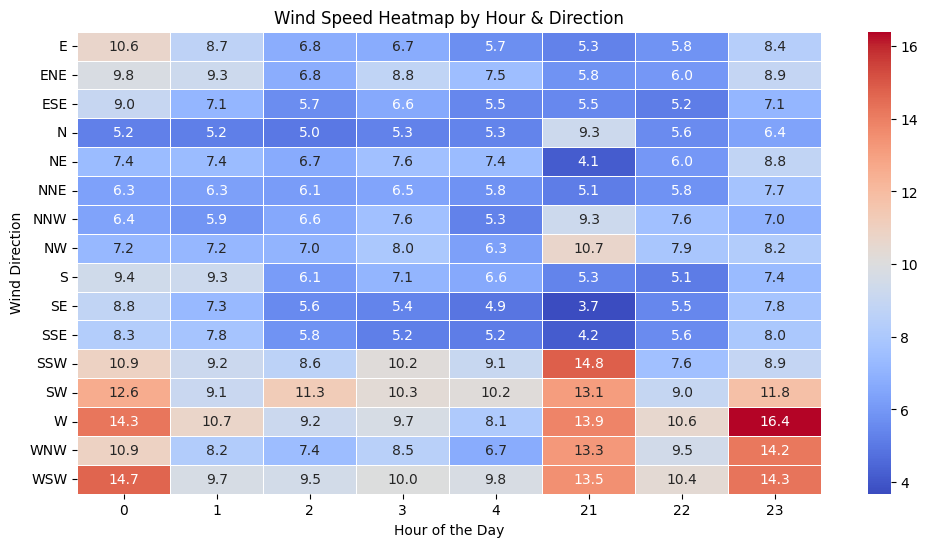

In [22]:
pivot_table = df2.pivot_table(values="wind_kph", index="wind_direction", columns="Hour", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Wind Direction")
plt.title("Wind Speed Heatmap by Hour & Direction")
plt.show()


# Overall heatmap


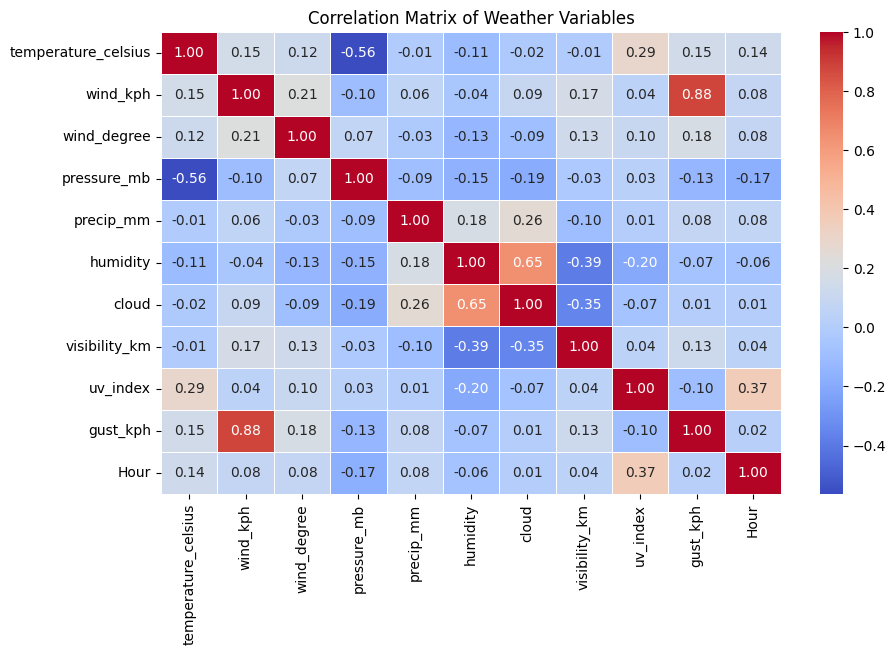

In [23]:
# Compute correlation matrix
correlation_matrix = df2.drop(columns=['wind_direction']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")
plt.show()
